# 1) Modules Importing

In [1]:
import pandas as pd
from matplotlib.pyplot import imread
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

## 1.1) Loading the Dataset

In [2]:
Df =r"D:\books for study\DEEP LEARNING\UTKFace"

## 1.2) Labels, Age, Gender, Ethnicity

In [3]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(Df)):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # skip non-image files
        image_path = os.path.join(Df, filename)
        ## Splitting the Filename into Age, Gender, Ethnicity As
        temp = filename.split('_')
        age = int(temp[0])
        gender = int(temp[1])

        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)


  0%|          | 0/23709 [00:00<?, ?it/s]

## After Storing about 23708 Images 
## 1.3) We will convert them into a DataFrame

In [4]:
df = pd.DataFrame()
df['image'],df['age'],df['gender'] = image_paths, age_labels, gender_labels

df.head()

image  age  gender
0  D:\books for study\DEEP LEARNING\UTKFace\100_0...  100       0
1  D:\books for study\DEEP LEARNING\UTKFace\100_0...  100       0
2  D:\books for study\DEEP LEARNING\UTKFace\100_1...  100       1
3  D:\books for study\DEEP LEARNING\UTKFace\100_1...  100       1
4  D:\books for study\DEEP LEARNING\UTKFace\100_1...  100       1

## 1.4) Creating A Gender Dictionary (Male & Female)

In [5]:
gender_dict = {0:'Male', 1:'Female'}

***
# 2) Data Analysis

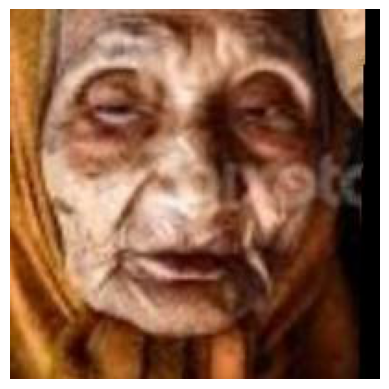

In [6]:
from PIL import Image
img = Image.open(df['image'][10])
plt.axis('off')
plt.imshow(img);


## 2.1) Seaborn Plotting for showing the Average AGE and Genders Among the Dataset

<AxesSubplot:xlabel='age', ylabel='Density'>

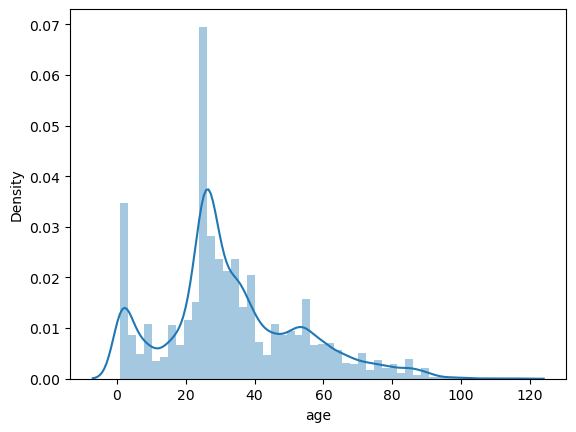

In [7]:
sns.distplot(df['age'])

<AxesSubplot:ylabel='count'>

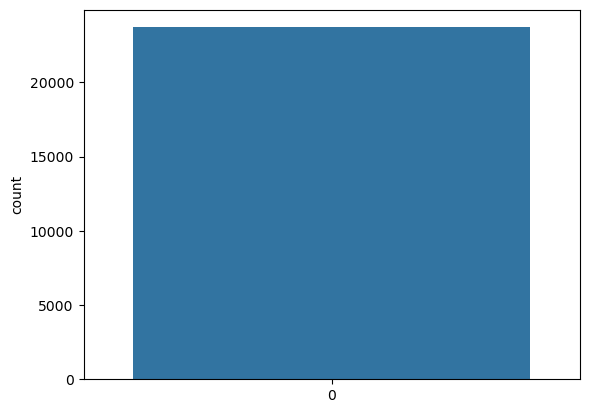

In [8]:
sns.countplot(df['gender'])

## 2.2) Adjusting the Size and grid of the Images

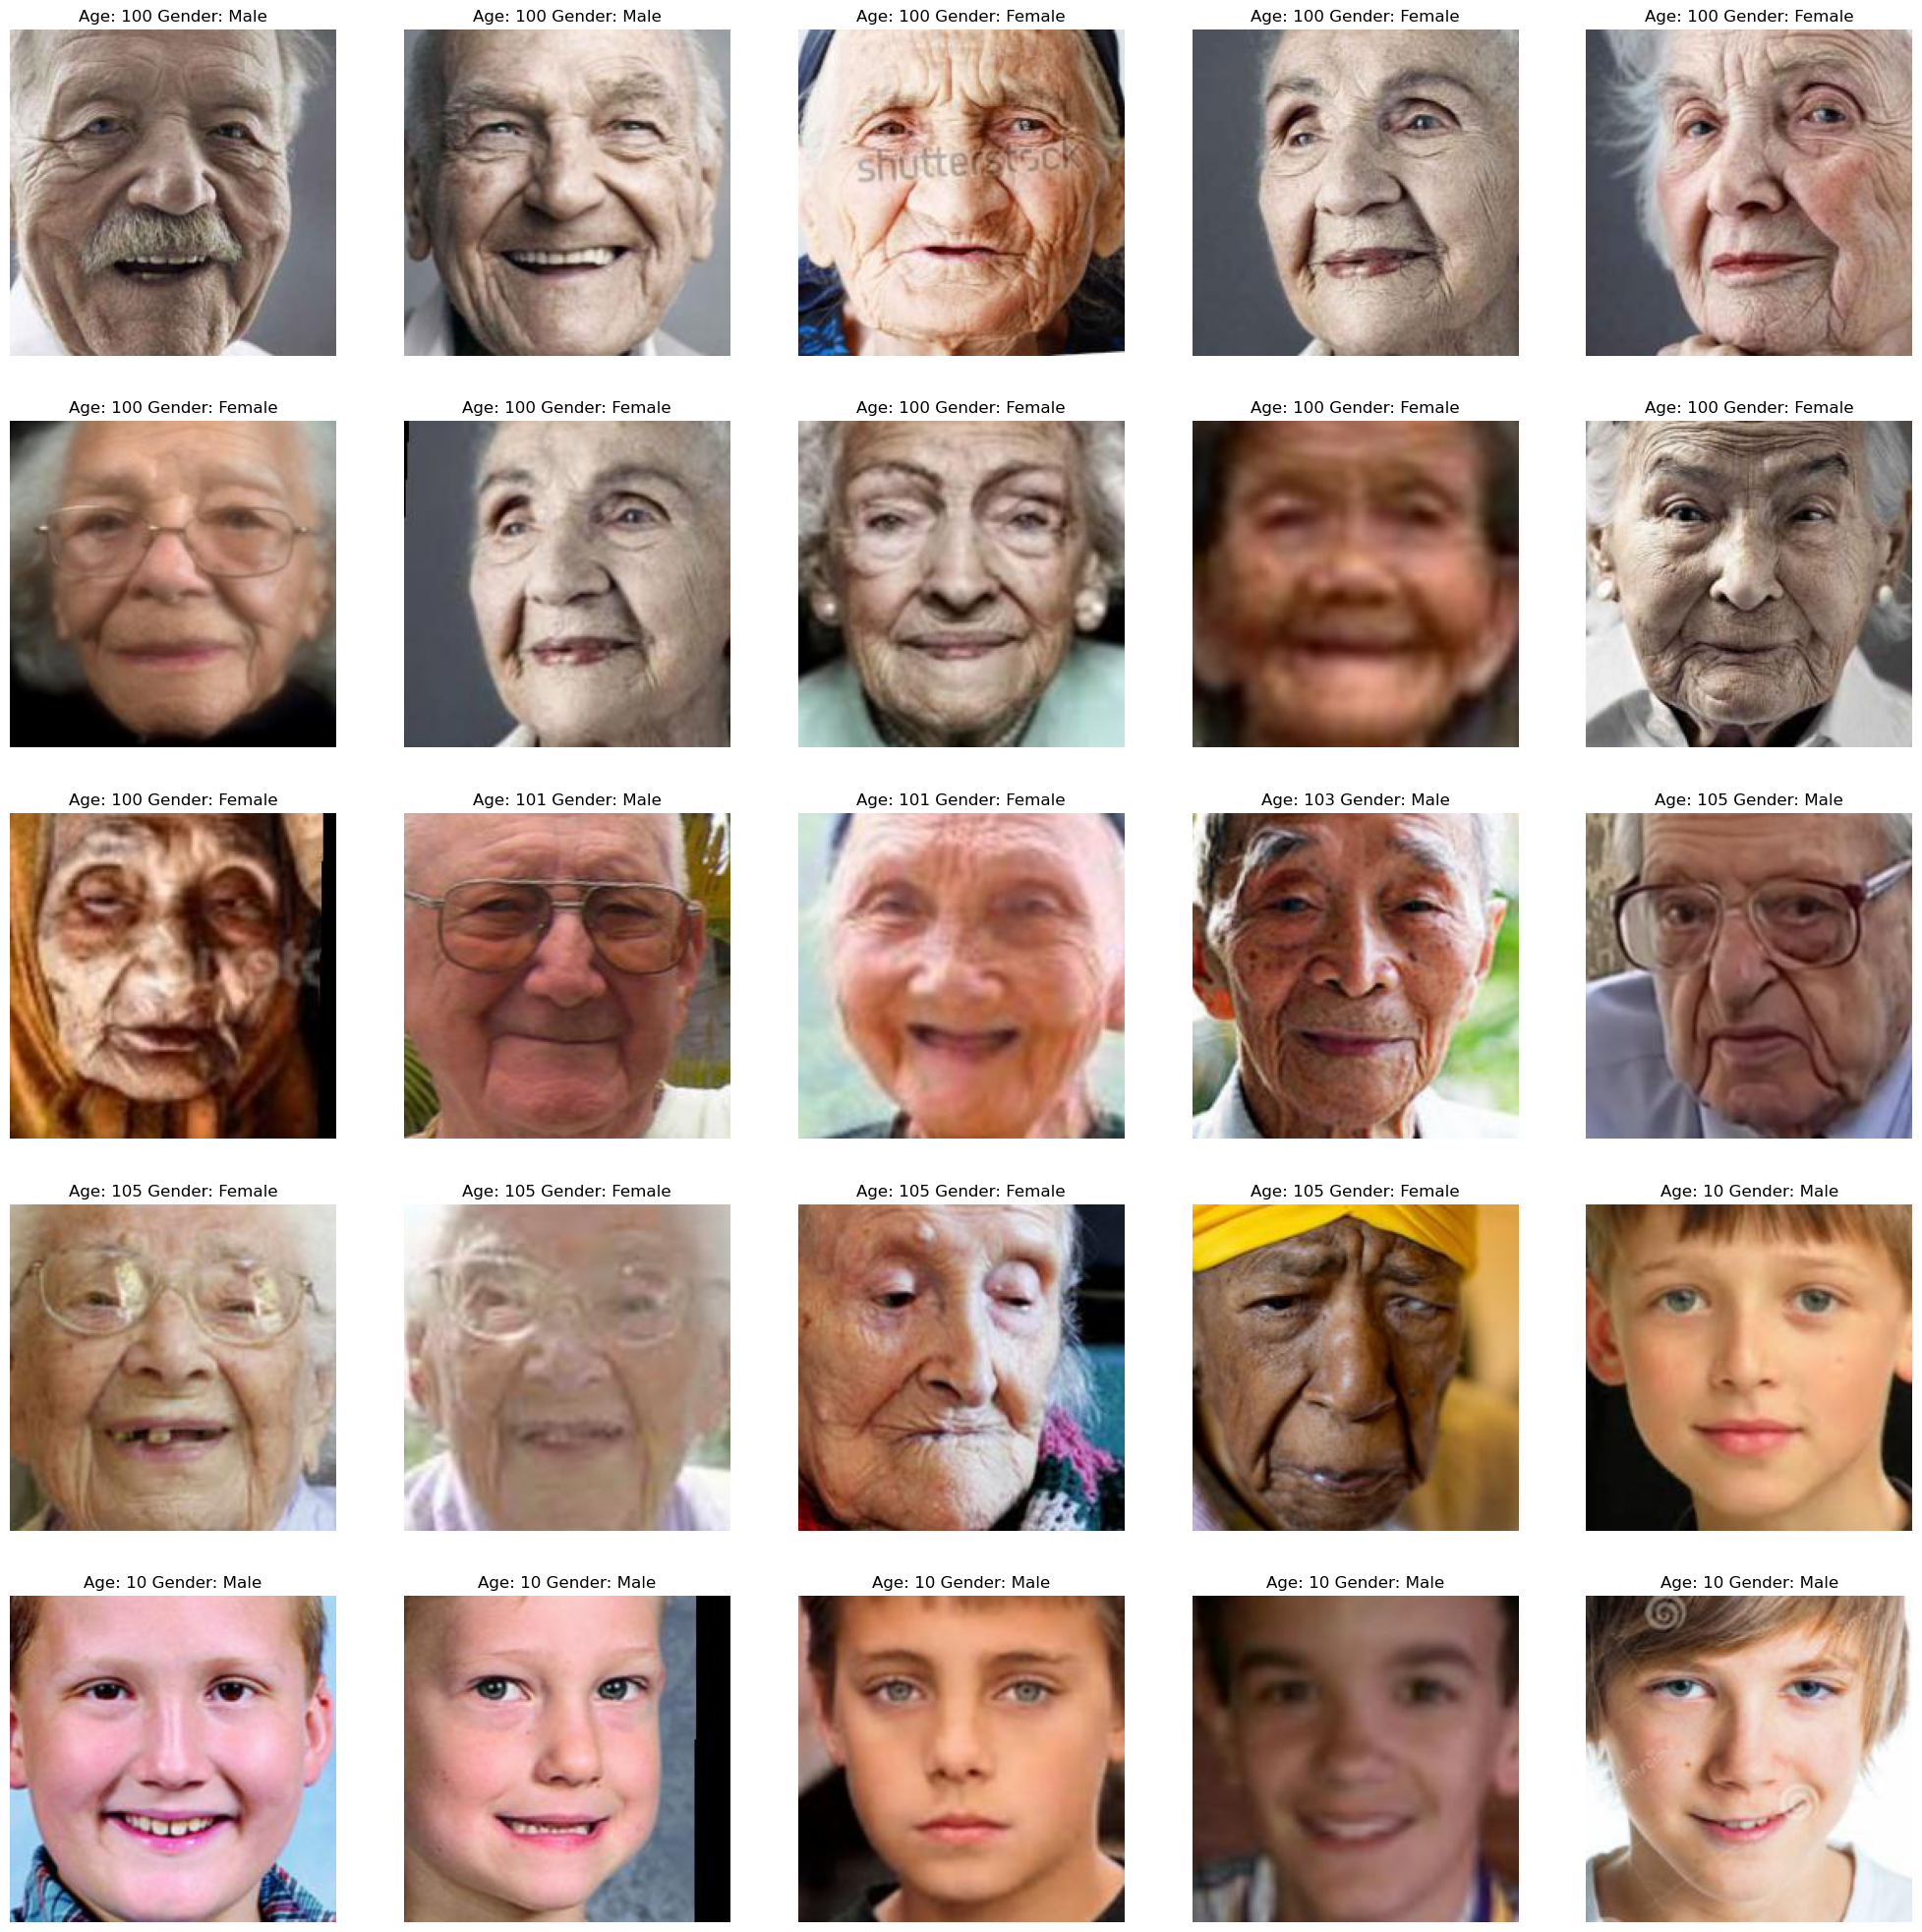

In [9]:
plt.figure(figsize=(25, 25))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1) 
    
    img = load_img(file)
    img = np.array(img)  
    
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

***
# 3) Feature Extraction

In [10]:
def extract_features(images):
    
    features = [] 
    for image in tqdm(images):
        
        img = load_img(image, grayscale = True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    ## Constant Reshaping Scale for grayscaling Only
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [11]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [12]:
X.shape

(23708, 128, 128, 1)

## 3.1) Normalizing the Images

In [13]:
X = X/255.0 
## As Pixeling is from 0 --> 255

In [14]:
Y_gender = np.array(df['gender'])
Y_age = np.array(df['age'])

In [15]:
input_shape = (128, 128, 1)


# Model Creation

In [16]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation = 'relu') (inputs)
maxpool_1 = MaxPooling2D(pool_size = (2, 2)) (conv_1)

conv_2 = Conv2D(64, kernel_size=(3, 3), activation = 'relu') (maxpool_1)
maxpool_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

conv_3 = Conv2D(128, kernel_size=(3, 3), activation = 'relu') (maxpool_2)
maxpool_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

conv_4 = Conv2D(256, kernel_size=(3, 3), activation = 'relu') (maxpool_3)
maxpool_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

flatten = Flatten() (maxpool_4)

# Fully Connected Layers

# Dense Layers
dense_1 = Dense(256,activation = 'relu') (flatten)
dense_2 = Dense(256,activation = 'relu') (flatten)
# Dropout Layers
dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)
# Output Layers
output_1 = Dense(1, activation='sigmoid', name ='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name ='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer = 'adam', metrics = ['accuracy'])

***

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

In [18]:
history = model.fit(x=X, y=[Y_gender, Y_age], batch_size = 32, epochs = 30, validation_split = 0.2)

Epoch 1/30
593/593 [==============================] - 244s 408ms/step - loss: 11.3154 - gender_out_loss: 0.6971 - age_out_loss: 10.6184 - gender_out_accuracy: 0.5082 - age_out_accuracy: 0.0592 - val_loss: 34.9394 - val_gender_out_loss: 0.6925 - val_age_out_loss: 34.2470 - val_gender_out_accuracy: 0.5793 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 266s 449ms/step - loss: 8.7110 - gender_out_loss: 0.5367 - age_out_loss: 8.1743 - gender_out_accuracy: 0.7185 - age_out_accuracy: 0.0477 - val_loss: 28.2841 - val_gender_out_loss: 0.5141 - val_age_out_loss: 27.7701 - val_gender_out_accuracy: 0.7554 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 257s 434ms/step - loss: 7.3864 - gender_out_loss: 0.4076 - age_out_loss: 6.9789 - gender_out_accuracy: 0.8107 - age_out_accuracy: 0.0284 - val_loss: 28.2273 - val_gender_out_loss: 0.4782 - val_age_out_loss: 27.7491 - val_gender_out_accuracy: 0.7817 - val_age_out_accur

# Plotting Out the Results of the 30 Epoches

# Accuracy Plot Graph (Gender)

<Figure size 640x480 with 0 Axes>

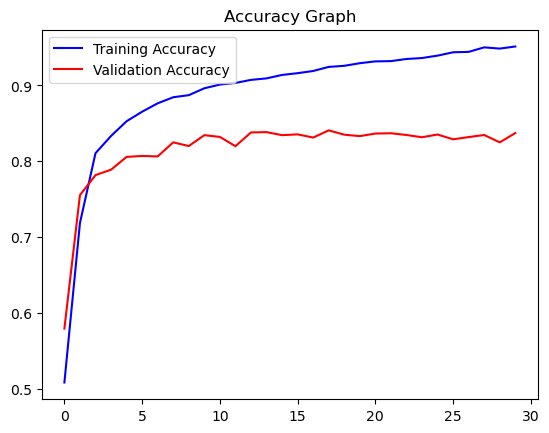

<Figure size 640x480 with 0 Axes>

In [19]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

***
## Loss Plot Graph (Gender)

<Figure size 640x480 with 0 Axes>

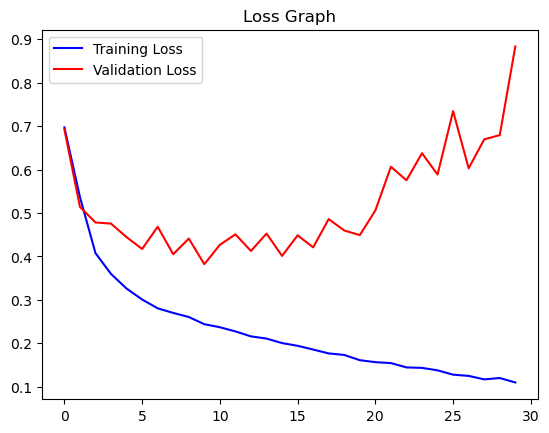

<Figure size 640x480 with 0 Axes>

In [20]:
loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()

***
## Accuracy Plot Graph (Age)

<Figure size 640x480 with 0 Axes>

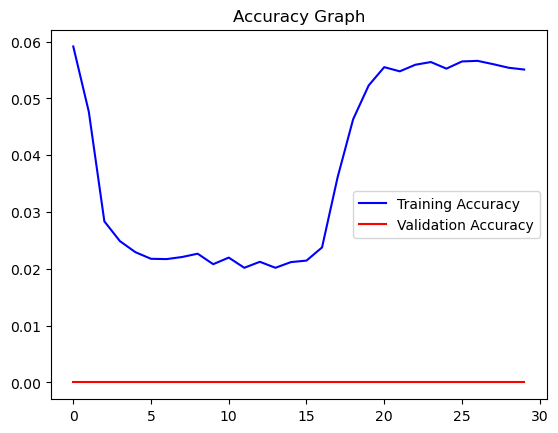

<Figure size 640x480 with 0 Axes>

In [21]:
acc = history.history['age_out_accuracy']
val_acc = history.history['val_age_out_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

***
## Loss Plot Graph (Age)

<Figure size 640x480 with 0 Axes>

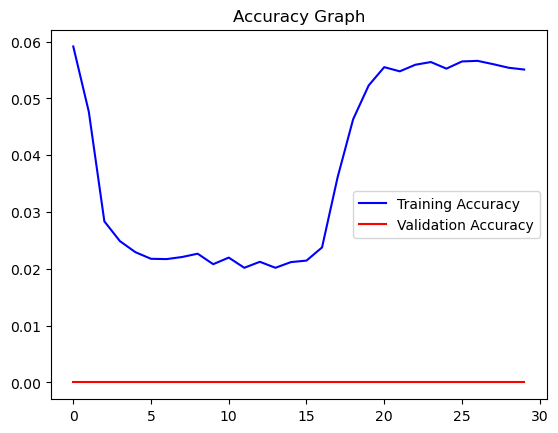

<Figure size 640x480 with 0 Axes>

In [22]:
loss = history.history['age_out_accuracy']
val_loss = history.history['val_age_out_accuracy']

epochs = range(len(loss))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

***
# Model Prediction

Original gender: Female Original Age 16
1/1 [==============================] - 0s 315ms/step
Predicted gender: Female Predicted Age 16


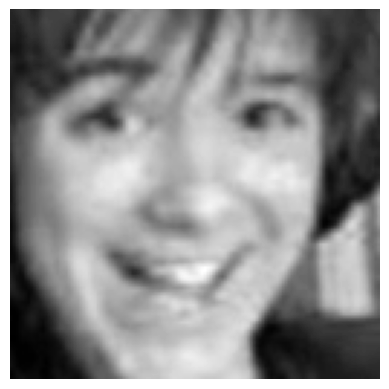

In [23]:
image_index = 1001
print("Original gender:", gender_dict[Y_gender[image_index]], "Original Age", Y_age[image_index])

Pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
Pred_gender = gender_dict[round(Pred[0][0][0])]
Pred_age = round(Pred[1][0][0])

print("Predicted gender:", Pred_gender, "Predicted Age", Pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original gender: Male Original Age 25
1/1 [==============================] - 0s 27ms/step
Predicted gender: Male Predicted Age 24


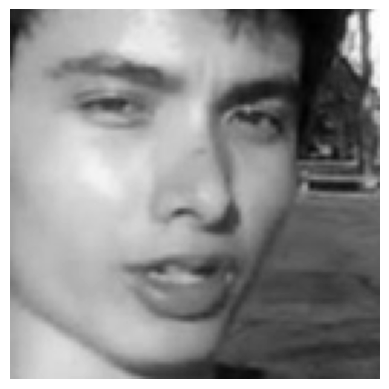

In [55]:
image_index = 5000
print("Original gender:", gender_dict[Y_gender[image_index]], "Original Age", Y_age[image_index])

Pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
Pred_gender = gender_dict[round(Pred[0][0][0])]
Pred_age = round(Pred[1][0][0])

print("Predicted gender:", Pred_gender, "Predicted Age", Pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original gender: Male Original Age 1
1/1 [==============================] - 0s 28ms/step
Predicted gender: Male Predicted Age 1


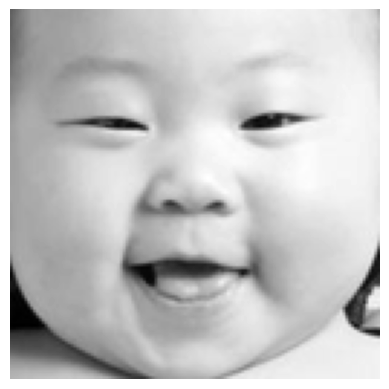

In [25]:
image_index = 2000
print("Original gender:", gender_dict[Y_gender[image_index]], "Original Age", Y_age[image_index])

Pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
Pred_gender = gender_dict[round(Pred[0][0][0])]
Pred_age = round(Pred[1][0][0])

print("Predicted gender:", Pred_gender, "Predicted Age", Pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

***

1/1 [==============================] - 0s 111ms/step


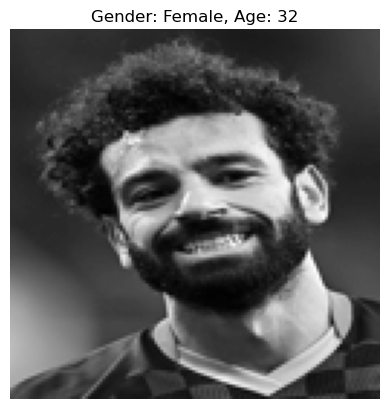

In [54]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

model = tf.keras.models.load_model(r'C:\Users\hp\Desktop\cv photo\gender_age_model.h5')

img_path = r'C:\Users\hp\Desktop\1\images.jpeg'
img = Image.open(img_path).convert('L')
img = img.resize((128, 128)) 
img = np.asarray(img, dtype=np.float32) 
img /= 255.0
img = np.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis=0)
pred = model.predict(img.reshape(1, 128, 128, 1))
pred_gender = "Male" if pred[0][0] > 0.5 else "Female"
pred_age = int(round(pred[1][0][0]))
plt.imshow(img.reshape(128, 128), cmap='gray')
plt.title(f'Gender: {pred_gender}, Age: {pred_age}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 114ms/step


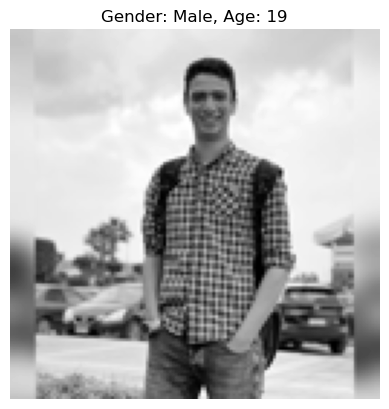

In [56]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
model = tf.keras.models.load_model(r'C:\Users\hp\Desktop\cv photo\gender_age_model.h5')
img_path = r'C:\Users\hp\Desktop\1\124552396_1858954030939369_7890634161323325499_n.jpg'
img = Image.open(img_path).convert('L')
img = img.resize((128, 128))
img = np.asarray(img, dtype=np.float32)
img /= 255.0 
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
pred_gender = "Male" if pred[0][0] > 0.5 else "Female"
pred_age = int(round(pred[1][0][0]))

# Display results
plt.imshow(img[0].reshape(128, 128), cmap='gray')
plt.title(f'Gender: {pred_gender}, Age: {pred_age}')
plt.axis('off')
plt.show()
